**CNN with Tensorflow|Keras for Fashion MNIST**

**Dataset Overview:**

The Fashion-MNIST dataset, developed by Zalando, comprises images of various articles of clothing. It is designed as a more complex alternative to the original MNIST dataset, serving the same purpose of benchmarking machine learning algorithms. The dataset includes a training set of 60,000 images and a test set of 10,000 images, all presented in grayscale with dimensions of 28x28 pixels.

**Dataset Content:**

Each image in the dataset consists of 784 pixels, with each pixel represented by an integer value ranging from 0 to 255, where higher values correspond to darker pixels. The dataset is structured with 785 columns: the first column contains the class labels, which correspond to different types of clothing items, while the remaining 784 columns represent the pixel values of the images.

***Loading required Packages***

Updating TensorFlow and Keras - have the latest version of TensorFlow installed, as Keras is now part of TensorFlow (tf.keras).

In [ ]:
!pip install --upgrade tensorflow


Using TensorFlow's Keras Utilities -
Instead of importing from keras.utils.vis_utils, you can import from tensorflow.keras.utils.

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot


Installing pydot and graphviz -
Having the pydot and graphviz libraries installed, which are required for visualizing models.

In [ ]:
!pip install pydot
!apt-get install graphviz -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model  # Updated import
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import tensorflow as tf
print(tf.__version__)



2.17.0


***Giving Required Parameters***

In [ ]:
import os

# Define IS_LOCAL (set to True or False depending on your environment)
IS_LOCAL = False  # Change this to True if running locally

# Set the path based on IS_LOCAL
if IS_LOCAL:
    PATH = "/path/to/local/fashion-mnist_train.csv"  # Adjust the path as per your local setup
else:
    PATH = "/content/fashion-mnist_test.csv"  # Path in a cloud-based environment like Google Colab

# Check if the file exists
if os.path.isfile(PATH):
    print(f"File {os.path.basename(PATH)} exists.")
else:
    print(f"File {os.path.basename(PATH)} does not exist.")



File fashion-mnist_test.csv exists.


The dataset includes images categorized into 10 distinct classes: 0 represents T-shirt/top, 1 corresponds to Trouser, 2 to Pullover, 3 to Dress, 4 to Coat, 5 to Sandal, 6 to Shirt, 7 to Sneaker, 8 to Bag, and 9 to Ankle boot. Each image has dimensions of 28x28 pixels. The data is split into two separate datasets: one for training and one for testing.

In [ ]:
# Assuming PATH already points to the correct directory or file
train_file = PATH  # No need to concatenate again
test_file  = PATH.replace("fashion-mnist_train.csv", "fashion-mnist_test.csv")

# Read the data
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)


**The dimensions of the original training and test datasets are as follows:**

In [ ]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 10000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


The distribution of images across different classes in the training set will be examined to understand how many images belong to each class.

In [ ]:
# Create a dictionary for each type of label
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


The training set exhibits an equal distribution of classes, with each class representing 10% of the total dataset. The next step is to verify whether the test set follows the same distribution. Additionally, visualizing the class distribution for better insight is recommended.

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


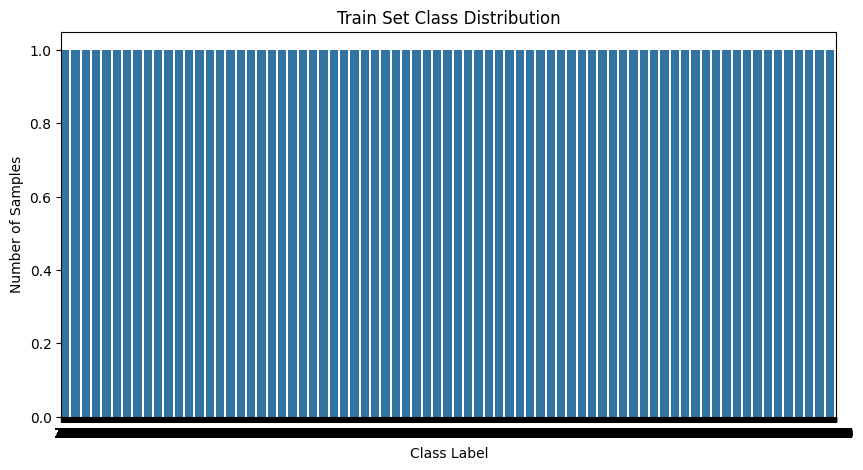

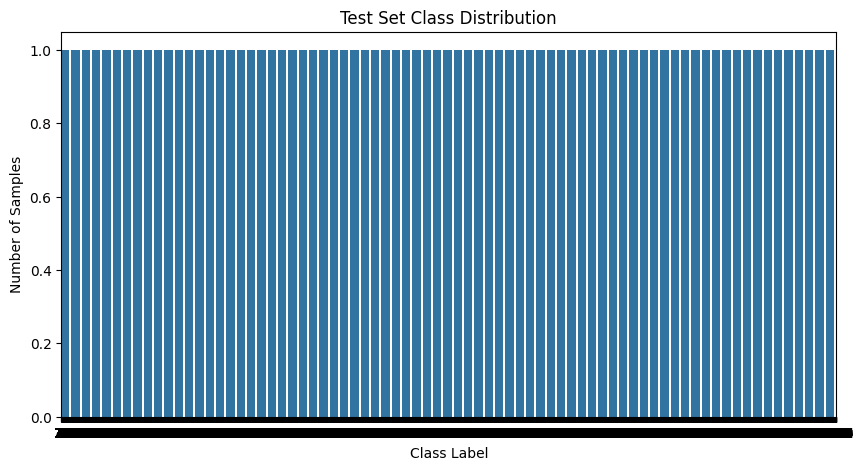

In [ ]:
# Check class distribution in the test set
get_classes_distribution(test_data)

# Plot the class distribution for both the train and test sets
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for train set
plt.figure(figsize=(10, 5))
sns.countplot(train_data['label'])
plt.title('Train Set Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()

# Plot for test set
plt.figure(figsize=(10, 5))
sns.countplot(test_data['label'])
plt.title('Test Set Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()


<ipython-input-16-734b4e7b7b77>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




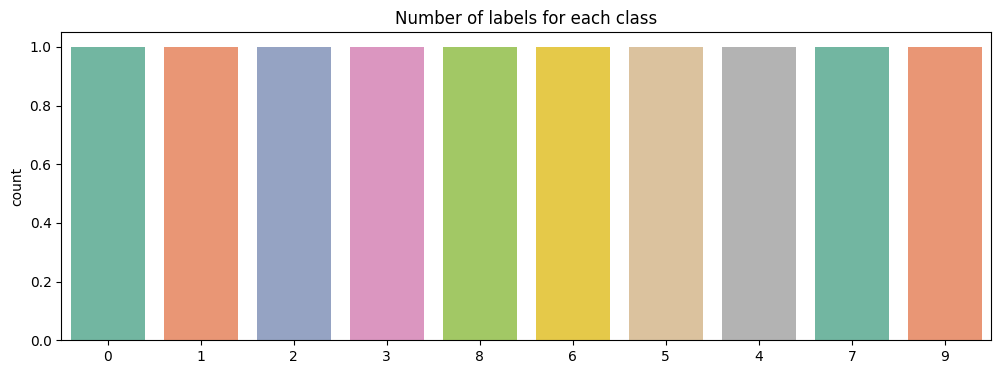

In [ ]:
def plot_label_per_class(data):
    # Create a color palette with different colors for each class
    palette = sns.color_palette("Set2", len(labels))  # You can change "Set2" to other palettes like "husl", "coolwarm", etc.
    # Plot the data with the specified color palette
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order=data["label"].value_counts().index, palette=palette)
    g.set_title("Number of labels for each class")
    # Annotate each bar with the corresponding class label
    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()
# Call the function to plot
plot_label_per_class(train_data)


**Test set images class distribution**

In [ ]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


In the test set, the distribution of classes is also uniform, with each class representing 10% of the total dataset. Next,visualizing the class distribution for the test set.

<ipython-input-16-734b4e7b7b77>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




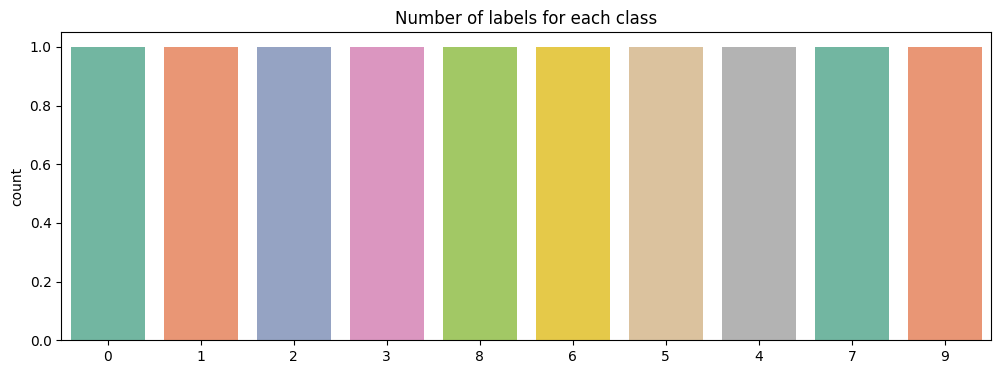

In [ ]:
plot_label_per_class(test_data)

**Train Set Images**
Visualizing a few sample images from the training set. Each image will be labeled with its corresponding fashion item category.

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []
    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])
    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels
train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


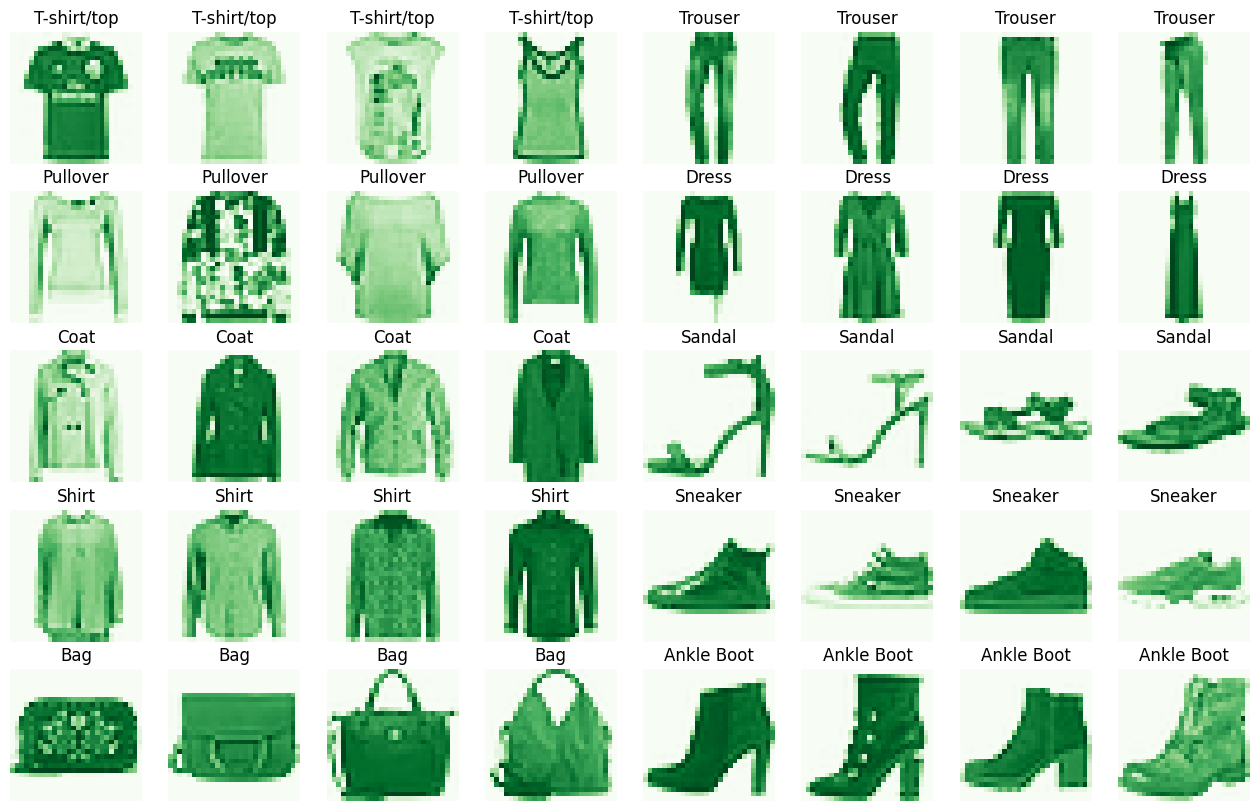

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Greens")

**Test Set Images**
Plotting a selection of images from the test set, along with their corresponding labels

Total number of sample images to plot:  40


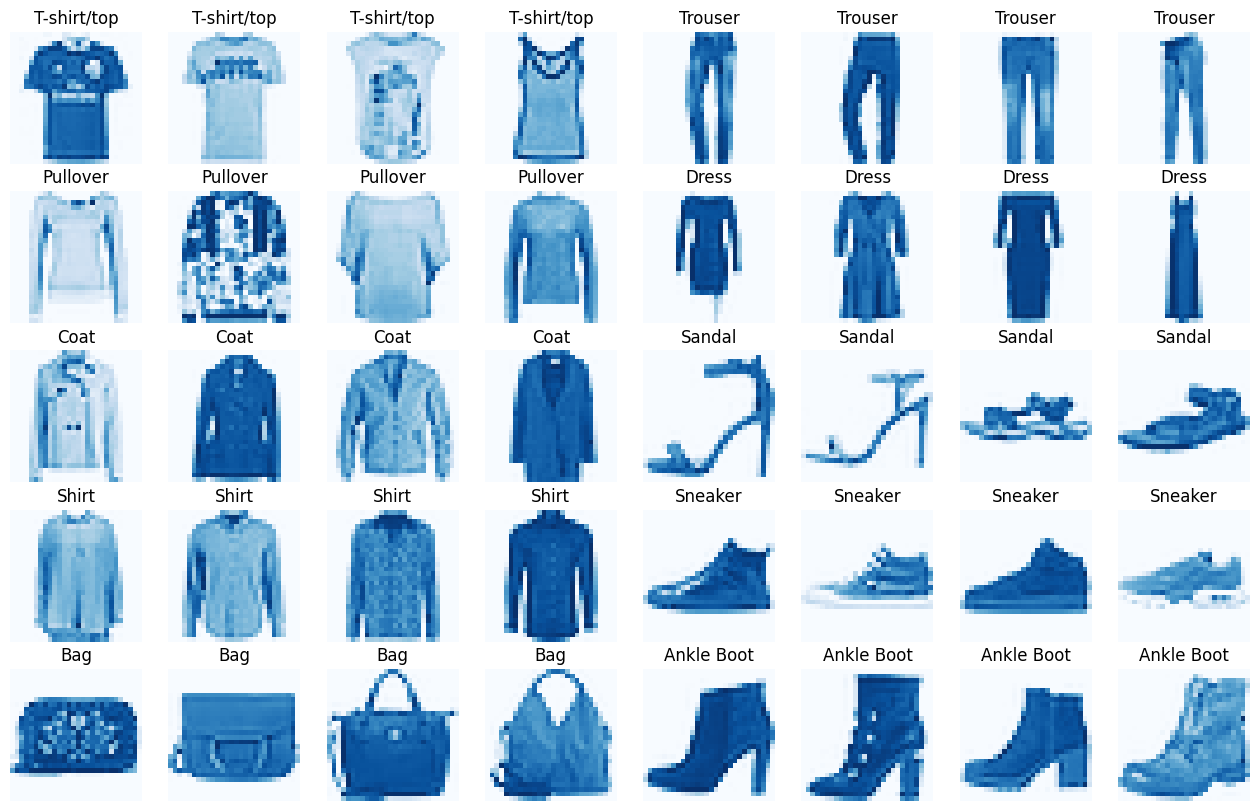

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

**Model Preparation** -

To begin with, the model preparation involves data preprocessing steps. This step is crucial to prepare the dataset for training the model effectively.

**Data Preprocessing** -

In the preprocessing stage, the data is reshaped from a single dimension of 784 features to a 3D shape of (28, 28, 1) to match the input requirements of a convolutional neural network (CNN). Additionally, the labels, which represent the target features, are stored separately in a vector.

In [ ]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [ ]:
import keras
from keras.utils import to_categorical

In [ ]:
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

The original training set is further divided into a new training set and a validation set. The validation set will comprise 20% of the original training set, ensuring a train-to-validation split ratio of 0.8 to 0.2.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The dimmension of the processed train, validation and test set are as following:

In [ ]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 8000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 2000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


Checking the class inbalance for the rsulted training set.

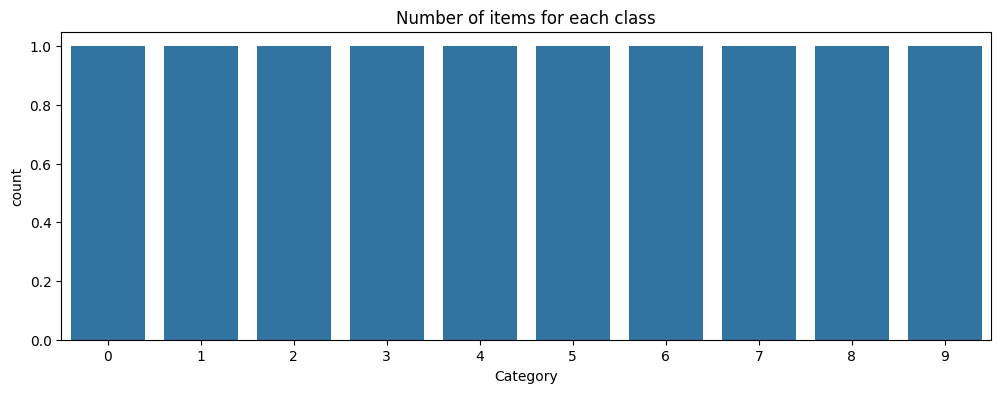

Pullover            :   818 or 10.225%
Trouser             :   805 or 10.0625%
Coat                :   805 or 10.0625%
T-shirt/top         :   802 or 10.025%
Shirt               :   802 or 10.025%
Sandal              :   801 or 10.012500000000001%
Bag                 :   797 or 9.9625%
Sneaker             :   793 or 9.9125%
Dress               :   791 or 9.887500000000001%
Ankle Boot          :   786 or 9.825000000000001%


In [ ]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")

    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))

    plt.show()

def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

**For the Validation set:**

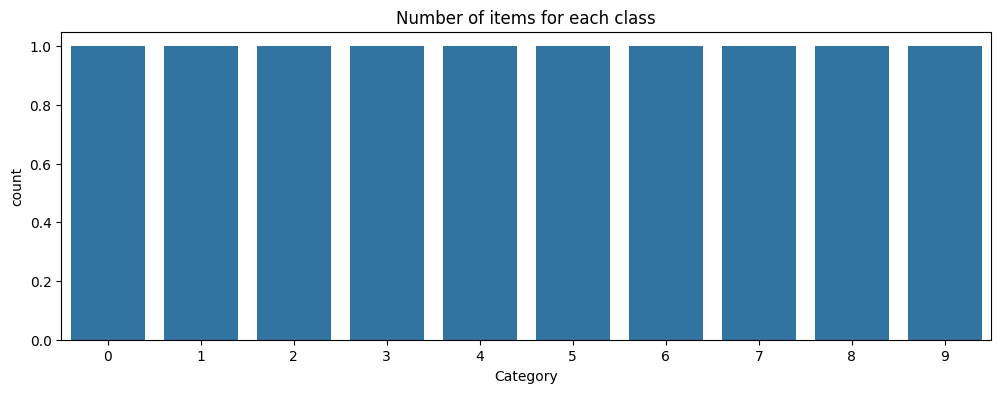

Ankle Boot          :   214 or 10.7%
Dress               :   209 or 10.45%
Sneaker             :   207 or 10.35%
Bag                 :   203 or 10.15%
Sandal              :   199 or 9.950000000000001%
T-shirt/top         :   198 or 9.9%
Shirt               :   198 or 9.9%
Trouser             :   195 or 9.75%
Coat                :   195 or 9.75%
Pullover            :   182 or 9.1%


In [ ]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

Both the train and validation set are unbalanced with respect of distribution of classes.

To train the model, a **Sequential model architecture** is employed. The Sequential model, which is essentially a linear stack of layers, is chosen for its simplicity and effectiveness in image classification tasks. The layers added to this model are as follows:

**Conv2D Layer:**

Filters: 32 (The number of kernels used in this layer)
Kernel Size: (3x3) (The dimensions of the convolutional kernel)
Activation: ReLU (Rectified Linear Unit)
Kernel Initializer: Default initializer for the kernel weights
Input Shape: (28x28x1) (The shape of the input images, where 28x28 are the dimensions and 1 is the number of channels)
This Conv2D layer performs a spatial convolution over the input images, outputting a 4D tensor.

**MaxPooling2D Layer:**

Pool Size: (2x2) (The factors by which to downscale in both directions)
This layer reduces the spatial dimensions of the input by selecting the maximum value from each 2x2 region.

**Conv2D Layer:**

Filters: 64
Kernel Size: (3x3)
Activation: ReLU
A second convolutional layer is added, increasing the number of filters to 64 for more feature extraction.

**MaxPooling2D Layer:**

Pool Size: (2x2)
Similar to the first MaxPooling2D layer, this one further reduces the spatial dimensions.

**Conv2D Layer:**

Filters: 128
Kernel Size: (3x3)
Activation: ReLU
A third convolutional layer is added with 128 filters, capturing even more complex features.

**Flatten Layer:**

This layer flattens the input tensor into a vector, preparing it for the fully connected layers.

**Dense Layer:**

Units: 128 (Dimensionality of the output space)
Activation: ReLU
A fully connected layer is added to the model, consisting of 128 units with ReLU activation.

**Dense Layer (Output Layer):**

Units: 10 (Number of classes)
Activation: Softmax (Standard for multiclass classification)
The final layer is fully connected and uses a Softmax activation function to output probabilities for each class.

Finally, the model is compiled with the following parameters:

Loss: Categorical cross-entropy, suitable for multiclass classification
Optimizer: An optimizer of choice (e.g., Adam)
Metrics: Accuracy, to evaluate the model's performance

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



**Inspecting the Model**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

**Plotting the Model**

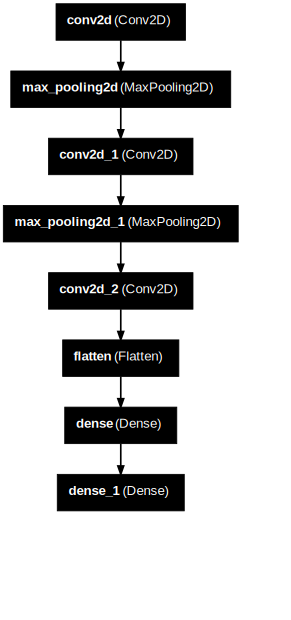

In [ ]:
# Plot the model and save as an image file with higher DPI
plot_model(model, to_file='model.png', show_shapes=True, dpi=100)
# Generate SVG with adjusted size
SVG(model_to_dot(model, dpi=60).create(prog='dot', format='svg'))

The model is then trained using the training dataset. Additionally, a validation dataset, which is a subset of the original training set, is utilized for validating the model's performance during the training process.



In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.5412 - loss: 1.2983 - val_accuracy: 0.7500 - val_loss: 0.6549
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.7918 - loss: 0.5622 - val_accuracy: 0.7935 - val_loss: 0.5484
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - accuracy: 0.8274 - loss: 0.4783 - val_accuracy: 0.8255 - val_loss: 0.4761
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.8456 - loss: 0.4121 - val_accuracy: 0.8200 - val_loss: 0.4818
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.8623 - loss: 0.3787 - val_accuracy: 0.8495 - val_loss: 0.4120
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.8834 - loss: 0.3280 - val_accuracy: 0.8430 - val_loss: 0.4095
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.8901 - loss: 0.2849 - val_accuracy: 0.8685 - val_loss: 0.3702
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9000 - loss: 0.2681 - val_accur

**The prediction accuracy is re-evaluated using the newly trained model to assess its performance.**

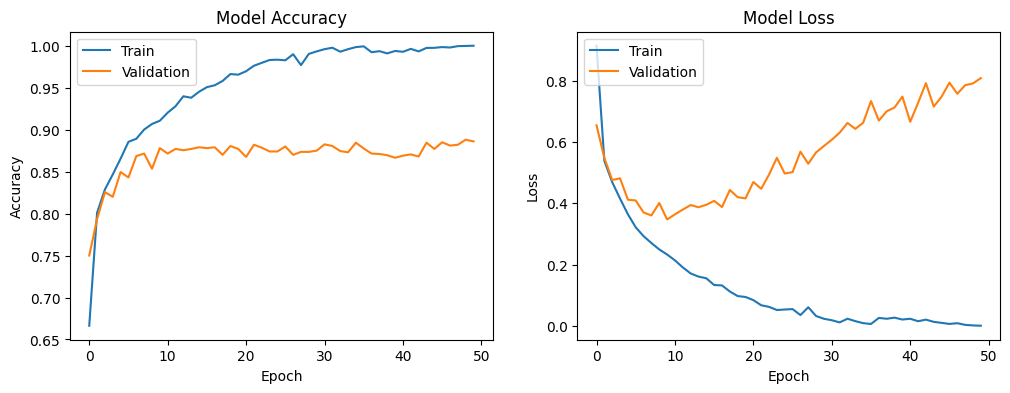

In [ ]:
plot_accuracy_and_loss(train_model)

**Evaluation After Adding Dropout Layers** -

After incorporating Dropout layers into the model, there is a noticeable improvement in both validation accuracy and validation loss. The next step involves evaluating the model's performance on the test set.

**Re-Evaluating Test Prediction Accuracy with the Updated Model** -

With the updated model, the test set predictions are re-evaluated to determine the accuracy, ensuring that the enhancements lead to better generalization on unseen data.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1621273010969162
Test accuracy: 0.9771999716758728


Also the test accuracy improved. The test accuracy is now approximately 0.93.

In [ ]:
# Get the predictions for the test data
predictions = model.predict(X_test)
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
# Get the true labels from the test data
y_true = test_data.iloc[:, 0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [ ]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9772
Incorrect predicted classes: 228


In [ ]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.96      0.96      0.96      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.96      0.98      0.97      1000
      Class 3 (Dress) :       0.98      0.97      0.97      1000
       Class 4 (Coat) :       0.96      0.97      0.96      1000
     Class 5 (Sandal) :       0.99      0.99      0.99      1000
      Class 6 (Shirt) :       0.95      0.93      0.94      1000
    Class 7 (Sneaker) :       0.99      0.99      0.99      1000
        Class 8 (Bag) :       0.99      1.00      1.00      1000
 Class 9 (Ankle Boot) :       0.99      0.99      0.99      1000

               accuracy                           0.98     10000
              macro avg       0.98      0.98      0.98     10000
           weighted avg       0.98      0.98      0.98     10000



**Evaluation of Class Performance** -

The model exhibits the highest accuracy for Class 1 (Trouser), Class 5 (Sandal), Class 8 (Bag), Class 9 (Ankle Boot), and Class 7 (Sneaker). Conversely, the accuracy is lowest for Class 6 (Shirt).

**Recall Analysis** -

The recall metric is observed to be highest for Class 8 (Bag) and Class 5 (Sandal), whereas it is lowest for Class 6 (Shirt) and Class 4 (Coat).

**F1-Score Analysis** -

The highest F1-scores are achieved for Class 1 (Trouser), Class 5 (Sandal), and Class 8 (Bag). On the other hand, Class 6 (Shirt) has the lowest F1-score, followed by Class 4 (Coat) and Class 2 (Pullover).

**Image Inspection** -

To further analyze the model's performance, two subsets of the predicted image set are created: one containing correctly classified images and the other containing incorrectly classified images. This allows for a closer inspection of the model's predictions.

**Visualize classified images**
Correctly classified images
We visualize few images correctly classified.

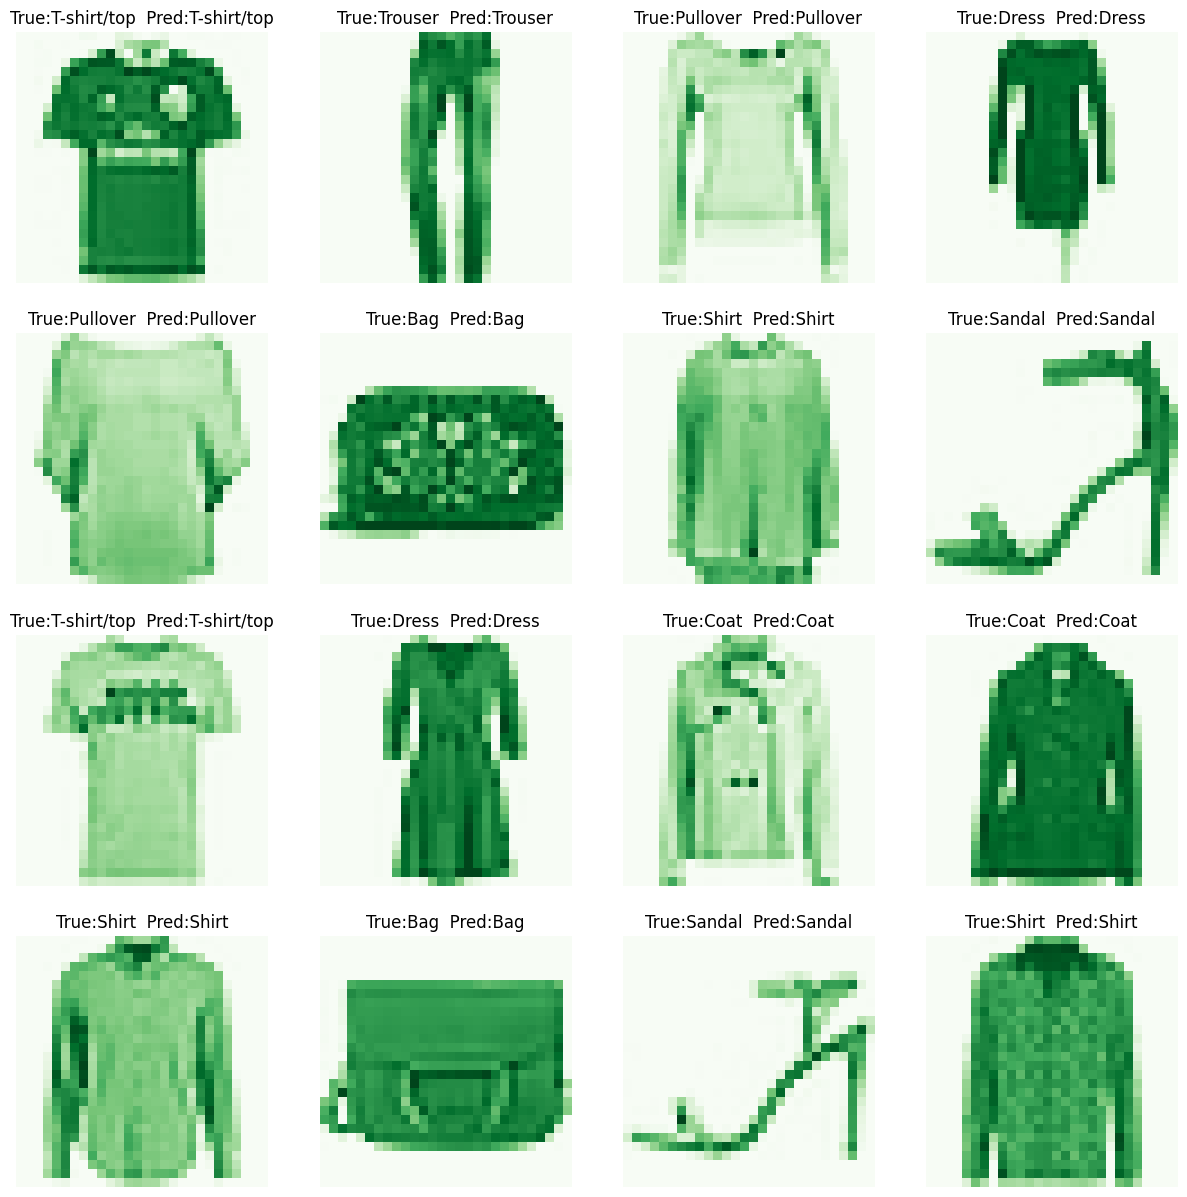

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()

plot_images(correct, "Greens")

**Incorrectly classified images**

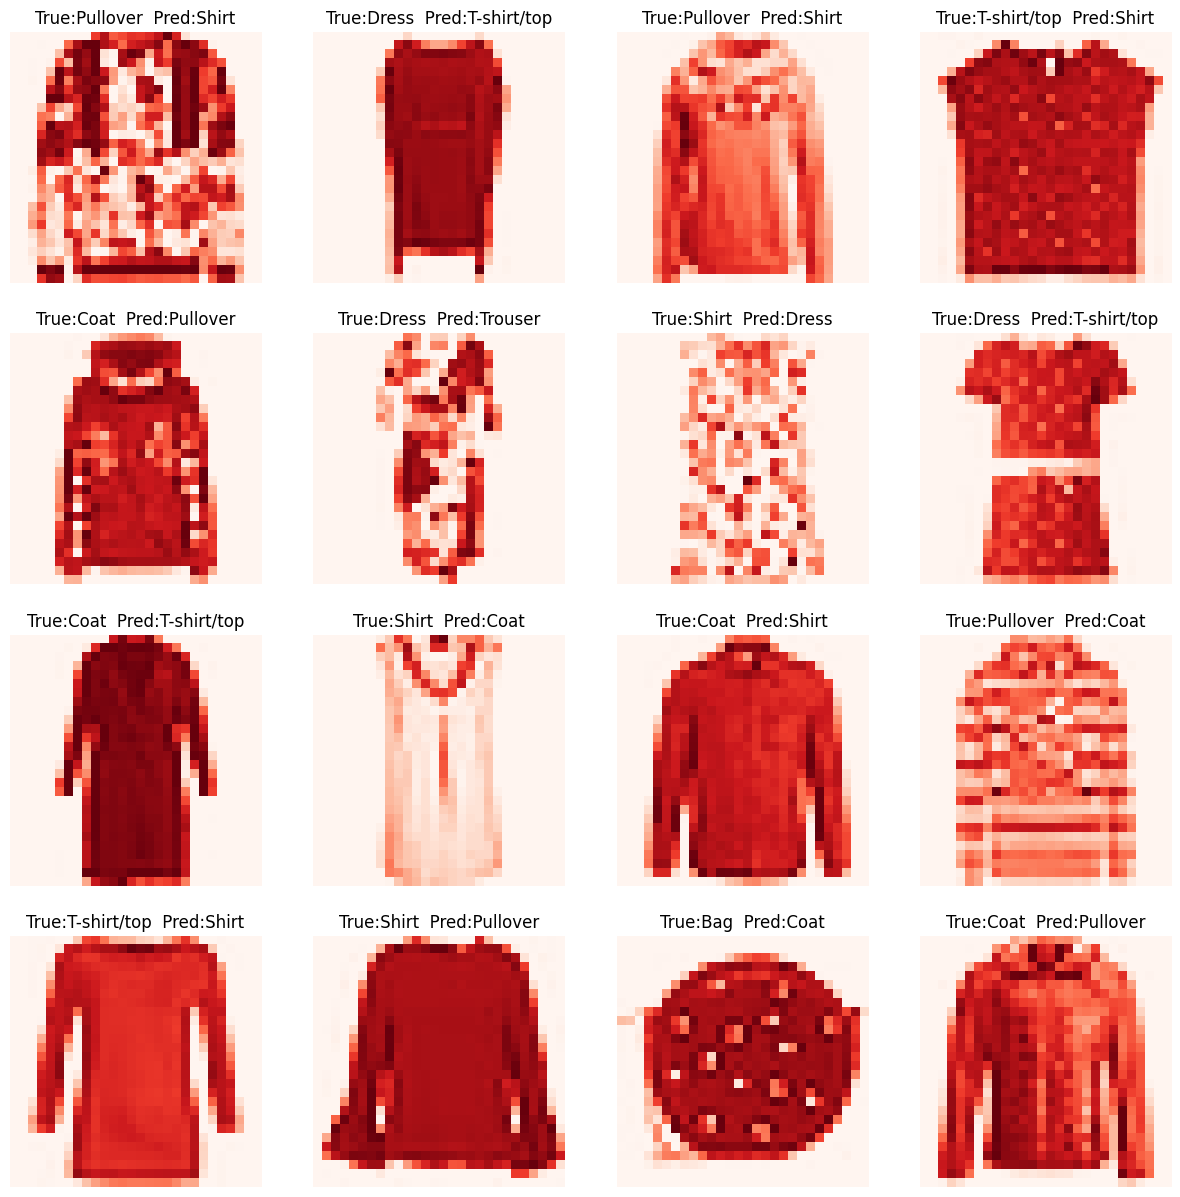

In [ ]:
plot_images(incorrect, "Reds")

**CONCLUSION** - The complex sequential model, incorporating multiple convolutional layers and trained over 50 epochs, initially achieved a test prediction accuracy of approximately 0.91. However, analysis of the validation accuracy and loss indicated that the model was overfitting to the training data.

To mitigate this issue, Dropout layers were introduced into the model architecture. This adjustment aimed to reduce overfitting and improve the generalization of the model. Upon retraining the model with these changes, the test prediction accuracy improved to approximately 0.93, even with the same number of training epochs.

Despite the overall improvement, some classes still showed room for further enhancement in prediction accuracy.